# EDA ON the Visadataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline

In [18]:
data=pd.read_csv("Visadataset.csv")
data.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.shape

(25480, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [10]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [19]:
num_col=[col for col in data.columns if data[col].dtype != 'O']
num_col

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [20]:
categorical_col = [col for col in data.columns if data[col].dtype =='O']
categorical_col

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

# Exploring Data

In [21]:
#check the numerical and categorial columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [14]:
#Categorical data
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('---------------------------')

EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: case_id, Length: 25480, dtype: float64
---------------------------
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: continent, dtype: float64
---------------------------
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: education_of_employee, dtype: float64
---------------------------
Y    58.092622
N    41.907378
Name: has_job_experience, dtype: float64
---------------------------
N    88.402669
Y    11.597331
Name: requires_job_training, dtype: float64
---------------------------
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.90345

# Missing Values

In [22]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [23]:
data.duplicated().count()

25480

In [24]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [25]:
data.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [26]:
data.cov()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,5.233996e+08,-17224.155003,-1.150624e+07
yr_of_estab,-1.722416e+04,1794.956681,2.761653e+04
prevailing_wage,-1.150624e+07,27616.530171,2.789524e+09


In [27]:
data['prevailing_wage'].skew()

0.7557760603032042

In [28]:
data['prevailing_wage'].kurtosis()

0.824273521052552

C:\Users\SSIM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevailing_wage', ylabel='Density'>

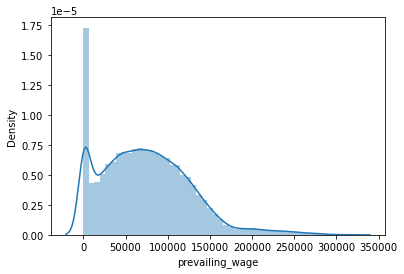

In [29]:
sns.distplot(data['prevailing_wage'])

In [30]:
data.groupby('case_status').count()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position
case_status,,,,,,,,,,,
Certified,17018,17018,17018,17018,17018,17018,17018,17018,17018,17018,17018
Denied,8462,8462,8462,8462,8462,8462,8462,8462,8462,8462,8462


In [31]:
# Find how many cases of Certified and Denied based on education
data.groupby(['case_status','education_of_employee']).count()

case_id  continent  has_job_experience  \
case_status education_of_employee                                           
Certified   Bachelor's                6367       6367                6367   
            Doctorate                 1912       1912                1912   
            High School               1164       1164                1164   
            Master's                  7575       7575                7575   
Denied      Bachelor's                3867       3867                3867   
            Doctorate                  280        280                 280   
            High School               2256       2256                2256   
            Master's                  2059       2059                2059   

                                   requires_job_training  no_of_employees  \
case_status education_of_employee                                           
Certified   Bachelor's                              6367             6367   
            Doctorate                               1912             1912   
            High School                             1164             1164   
            Master's                                7575             7575   
Denied      Bachelor's                              3867             3867   
            Doctorate                                280              280   
            High School                             2256             2256   
            Master's                                2059             2059   

                                   yr_of_estab  region_of_employment  \
case_status education_of_employee                                      
Certified   Bachelor's                    6367                  6367   
            Doctorate                     1912                  1912   
            High School                   1164                  1164   
            Master's                      7575                  7575   
Denied      Bachelor's                    3867                  3867   
            Doctorate                      280                   280   
            High School                   2256                  2256   
            Master's                      2059                  2059   

                                   prevailing_wage  unit_of_wage  \
case_status education_of_employee                                  
Certified   Bachelor's                        6367          6367   
            Doctorate                         1912          1912   
            High School                       1164          1164   
            Master's                          7575          7575   
Denied      Bachelor's                        3867          3867   
            Doctorate                          280           280   
            High School                       2256          2256   
            Master's                          2059          2059   

                                   full_time_position  
case_status education_of_employee                      
Certified   Bachelor's                           6367  
            Doctorate                            1912  
            High School                          1164  
            Master's                             7575  
Denied      Bachelor's                           3867  
            Doctorate                             280  
            High School                          2256  
            Master's                             2059

# Univariate Analyis of Categorical Features

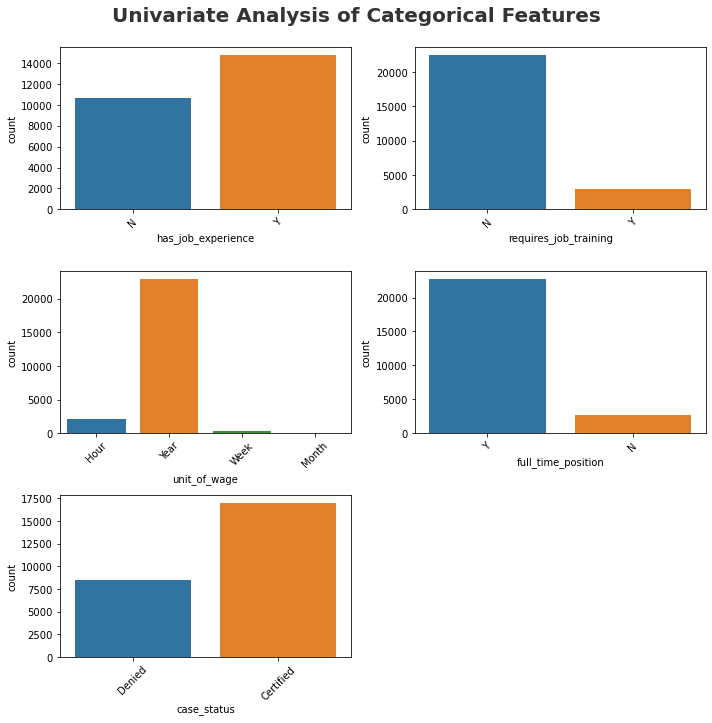

In [48]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat_features = [ 'has_job_experience', 'requires_job_training','unit_of_wage', 'full_time_position', 'case_status']
for i in range(0, len(cat_features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=data[cat_features[i]])
    plt.xlabel(cat_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [7]:
data['prevailing_wage'].max()

319210.27

<AxesSubplot:>

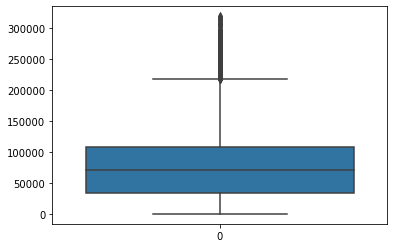

In [10]:
sns.boxplot(data=data['prevailing_wage'])

In [38]:
q1=data['prevailing_wage'].quantile(0.25)
q1

34015.479999999996

In [39]:
q3=data['prevailing_wage'].quantile(0.75)

In [40]:
q3

107735.51250000001

In [41]:
IQR = q3-q1

In [42]:
IQR

73720.03250000002

In [43]:
upper_limit=q3+(1.5*IQR)
upper_limit

218315.56125000003

In [44]:
lower_limit=q1-(1.5*IQR)
lower_limit

-76564.56875000002

In [45]:
outlier=data[data['prevailing_wage']>upper_limit]
outlier

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [46]:
data[num_col].drop(outlier.index)

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25474,2594,1979,51104.7800
25475,2601,2008,77092.5700
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


In [48]:
data.education_of_employee.value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [50]:
qualification = data.groupby('education_of_employee').prevailing_wage.mean()
qualification

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

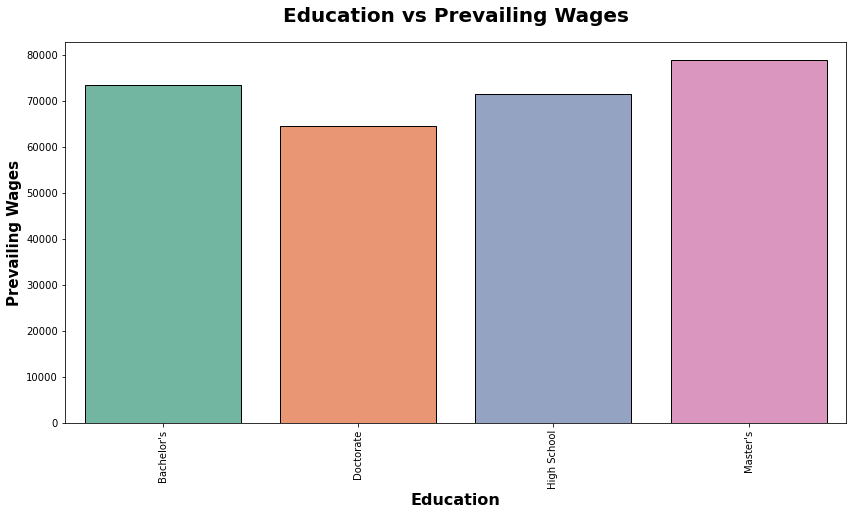

In [51]:
plt.subplots(figsize=(14,7))
sns.barplot(x=qualification.index, y=qualification.values,ec = "black",palette="Set2")
plt.title("Education vs Prevailing Wages", weight="bold",fontsize=20, pad=20)
plt.ylabel("Prevailing Wages", weight="bold", fontsize=15)
plt.xlabel("Education", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Applying feature scaling

In [1]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Initialise the Scaler
scaler = StandardScaler()
scaler.fit(data[num_col])

StandardScaler()

In [9]:
scaler.transform(data[num_col])

array([[ 0.38666657,  0.65122993, -1.39853722],
       [-0.14228155,  0.53321103,  0.1698353 ],
       [ 1.69498375,  0.6748337 ,  0.91907852],
       ...,
       [-0.19871259, -1.63833662,  1.36027953],
       [-0.16387483, -2.18122353,  0.22150859],
       [-0.10805575, -0.45814768, -0.06776315]])

In [ ]:
sns.heatmap(scaled_data.corr())

# Applying feature label coding for categorical variables

In [32]:
data["case_status"] = data["case_status"].astype('category')
data.dtypes

case_id                    object
continent                  object
education_of_employee      object
has_job_experience         object
requires_job_training      object
no_of_employees             int64
yr_of_estab                 int64
region_of_employment       object
prevailing_wage           float64
unit_of_wage               object
full_time_position         object
case_status              category
dtype: object

In [33]:
data["case_status_category"] = data["case_status"].cat.codes
data.dtypes

case_id                    object
continent                  object
education_of_employee      object
has_job_experience         object
requires_job_training      object
no_of_employees             int64
yr_of_estab                 int64
region_of_employment       object
prevailing_wage           float64
unit_of_wage               object
full_time_position         object
case_status              category
case_status_category         int8
dtype: object

In [34]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_category
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0


In [35]:
data["education_of_employee"] = data["education_of_employee"].astype('category')
data.dtypes

case_id                    object
continent                  object
education_of_employee    category
has_job_experience         object
requires_job_training      object
no_of_employees             int64
yr_of_estab                 int64
region_of_employment       object
prevailing_wage           float64
unit_of_wage               object
full_time_position         object
case_status              category
case_status_category         int8
dtype: object

In [36]:
data["education_of_employee_cat"] = data["education_of_employee"].cat.codes
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_category,education_of_employee_cat
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1,2
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0,3
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1,0
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,1,0
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0,3


# One-Hot Coding

In [38]:
pd.get_dummies(data, columns=["case_status"]).head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status_category,education_of_employee_cat,case_status_Certified,case_status_Denied
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,1,2,0,1
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0,3,1,0
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1,0,0,1
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1,0,0,1
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0,3,1,0


In [39]:
pd.get_dummies(data, columns=["education_of_employee"]).head()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,case_status_category,education_of_employee_cat,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's
0,EZYV01,Asia,N,N,14513,2007,West,592.2029,Hour,Y,Denied,1,2,0,0,1,0
1,EZYV02,Asia,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0,3,0,0,0,1
2,EZYV03,Asia,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,1,0,1,0,0,0
3,EZYV04,Asia,N,N,98,1897,West,83434.0300,Year,Y,Denied,1,0,1,0,0,0
4,EZYV05,Africa,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0,3,0,0,0,1


# Dimension Reduction using PCA

In [40]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns

In [58]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(data[num_col])) #scaling the data
scaled_data

,0,1,2
0,0.386667,0.651230,-1.398537
1,-0.142282,0.533211,0.169835
2,1.694984,0.674834,0.919079
3,-0.243429,-1.945186,0.169994
4,-0.200417,0.604022,1.428604
...,...,...,...
25475,-0.134020,0.674834,0.049924
25476,-0.104603,0.627626,3.876159
25477,-0.198713,-1.638337,1.360280
25478,-0.163875,-2.181224,0.221509


<AxesSubplot:>

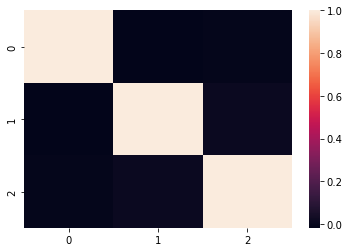

In [59]:
sns.heatmap(scaled_data.corr())

In [44]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PCA1','PCA2','PCA3'])
data_pca.head()

,PCA1,PCA2,PCA3
0,0.523344,-1.143264,0.973949
1,-0.504464,-0.042168,0.277741
2,0.125073,1.447359,1.436170
3,0.990084,0.455924,-1.638222
4,-1.215005,0.981625,0.078063


<AxesSubplot:>

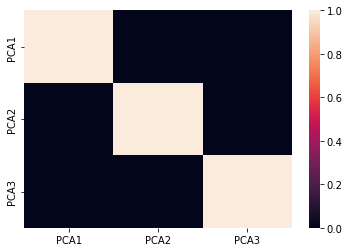

In [60]:
sns.heatmap(data_pca.corr())